In [1]:
from graph_gen.gen_graph import gen_graph

# Run common_imports.py
%run graph_gen/common_imports.py

In [2]:
from typing import List, Callable

def limit_n(a, b, max_list_size=3):
    if not isinstance(b, list):
        b = [b]
    result = a + b
    result = result[-max_list_size:]
    return result
    
import functools

# Have to wrap the partial function because Annotated expects a function
limit_n3 = functools.partial(limit_n, max_list_size=3)
def limit_n3_wrapped(*args, **kwargs):
    return limit_n(*args, **kwargs)

def limit3(a, b):
    max_list_size = 3
    if not isinstance(b, list):
        b = [b]
    result = a + b
    result = result[-max_list_size:]
    return result
    
class State(TypedDict):
    stuff: Annotated[list, limit3]
    count: int

def aaa(state):
    print("in AAA")
    count = state['count'] + 1 if state['count'] else 1
    astr = f"aaa{count}"
    return { "stuff": astr, "count": count }

def bbb(state):
    print("in BBB")
    count = state['count'] + 1
    astr = f"bbb{count}"
    return { "stuff": astr, "count": count }

def ccc(state):
    print("in CCC")
    count = state['count'] + 1
    astr = f"ccc{count}"
    return { "stuff": astr, "count": count }

def ddd(state):
    print("in DDD")
    count = state['count'] + 1
    astr = f"ddd{count}"
    return { "stuff": astr, "count": count }

def eee(state):
    print("in EEE")
    count = state['count'] + 1
    astr = f"eee{count}"
    return { "stuff": astr, "count": count }

def repeat(state):
    print("in REPEAT, False after we hit 13")
    return state['count'] < 13
    
graph_spec = """

aaa(State)
  => bbb

bbb
  => ccc

ccc
  => ddd

ddd
  => eee

eee
  repeat => aaa
  => END
  
"""

graph_code = gen_graph("reducer", graph_spec)
print(graph_code)
exec(graph_code)

reducer = StateGraph(State)
reducer.add_node('aaa', aaa)
reducer.add_node('bbb', bbb)
reducer.add_node('ccc', ccc)
reducer.add_node('ddd', ddd)
reducer.add_node('eee', eee)

reducer.set_entry_point('aaa')

reducer.add_edge('aaa', 'bbb')
reducer.add_edge('bbb', 'ccc')
reducer.add_edge('ccc', 'ddd')
reducer.add_edge('ddd', 'eee')
def after_eee(state: State):
    if repeat(state):
        return 'aaa'
    return 'END'

eee_dict = {'aaa': 'aaa', 'END': END}
reducer.add_conditional_edges('eee', after_eee, eee_dict)


reducer = reducer.compile()


In [3]:
type(limit3), type(limit_n3), type(limit_n3_wrapped)

(function, functools.partial, function)

In [4]:
limit_n3([100,200],[1,2]), limit3([100,200], [1,2]),limit_n3_wrapped([100,200],[1,2])

([200, 1, 2], [200, 1, 2], [200, 1, 2])

In [5]:
reducer.invoke({"stuff": []})

in AAA
in BBB
in CCC
in DDD
in EEE
in REPEAT, False after we hit 13
in AAA
in BBB
in CCC
in DDD
in EEE
in REPEAT, False after we hit 13
in AAA
in BBB
in CCC
in DDD
in EEE
in REPEAT, False after we hit 13


{'stuff': ['ccc13', 'ddd14', 'eee15'], 'count': 15}

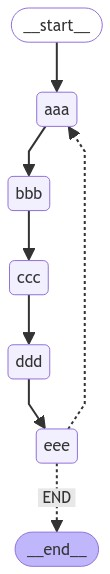

In [6]:
from IPython.display import Image, display

display(Image(reducer.get_graph().draw_mermaid_png()))

In [7]:
from langchain.globals import set_verbose

set_verbose(True)

reducer.invoke({"stuff": [], "count": 12})

in AAA
in BBB
in CCC
in DDD
in EEE
in REPEAT, False after we hit 13


{'stuff': ['ccc15', 'ddd16', 'eee17'], 'count': 17}